In [20]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the uploaded dataset
file_path = "Dataset_ecommerce.csv"
df = pd.read_csv(file_path)

In [24]:
# Display basic info and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(None,
   InvoiceNo          InvoiceDate  CustomerID StockCode  Description  Quantity  \
 0    536365  2010-12-01 08:26:00     17850.0    SC1734  Electronics        65   
 1    536365  2010-12-01 08:26:00     17850.0    SC2088    Furniture        95   
 2    536365  2010-12-01 08:26:00     17850.0    SC3463        Books        78   
 3    536365  2010-12-01 08:26:00     17850.0    SC6228         Toys        15   
 4    536365  2010-12-01 08:26:00     17850.0    SC2149         Toys        50   
 
    UnitPrice       Country  
 0      10.23         Egypt  
 1      19.61          Mali  
 2      61.49          Mali  
 3      24.73  South Africa  
 4      38.83        Rwanda  )

In [25]:
# Step 1: Data Cleaning & Feature Engineering

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [26]:
# Remove rows with missing CustomerID
df_cleaned = df.dropna(subset=['CustomerID'])


In [27]:
# Convert CustomerID to integer (optional for easier grouping)
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

C:\Users\OLUWATOSIN OLUWASEUN\AppData\Local\Temp\ipykernel_24452\313965870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)


In [28]:
# Create TotalPrice = Quantity * UnitPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

C:\Users\OLUWATOSIN OLUWASEUN\AppData\Local\Temp\ipykernel_24452\2067846665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [29]:
# Extract InvoiceMonth for cohort grouping
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')


C:\Users\OLUWATOSIN OLUWASEUN\AppData\Local\Temp\ipykernel_24452\3750081362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')


In [30]:
# Determine the first purchase month for each customer
df_cleaned['CohortMonth'] = df_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

C:\Users\OLUWATOSIN OLUWASEUN\AppData\Local\Temp\ipykernel_24452\3065804189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CohortMonth'] = df_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')


In [31]:
df_cleaned = df.dropna(subset=['CustomerID']).copy()

In [32]:
# Display sample and shape
df_cleaned.shape, df_cleaned.head()

((406829, 8),
   InvoiceNo         InvoiceDate  CustomerID StockCode  Description  Quantity  \
 0    536365 2010-12-01 08:26:00     17850.0    SC1734  Electronics        65   
 1    536365 2010-12-01 08:26:00     17850.0    SC2088    Furniture        95   
 2    536365 2010-12-01 08:26:00     17850.0    SC3463        Books        78   
 3    536365 2010-12-01 08:26:00     17850.0    SC6228         Toys        15   
 4    536365 2010-12-01 08:26:00     17850.0    SC2149         Toys        50   
 
    UnitPrice       Country  
 0      10.23         Egypt  
 1      19.61          Mali  
 2      61.49          Mali  
 3      24.73  South Africa  
 4      38.83        Rwanda  )

In [33]:
# Step 1: Convert InvoiceDate to datetime if not already
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Step 2: Extract InvoiceMonth
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Step 3: Get the CohortMonth (first purchase month per customer)
df_cleaned['CohortMonth'] = df_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# Step 4: Calculate CohortIndex
df_cleaned['CohortIndex'] = (
    (df_cleaned['InvoiceMonth'].dt.year - df_cleaned['CohortMonth'].dt.year) * 12
    + (df_cleaned['InvoiceMonth'].dt.month - df_cleaned['CohortMonth'].dt.month) + 1
)


In [34]:
# Step 2: Cohort Analysis

# Step 2.1: Calculate Cohort Index (how many months after the first purchase)
df_cleaned['CohortIndex'] = (
    (df_cleaned['InvoiceMonth'].dt.year - df_cleaned['CohortMonth'].dt.year) * 12 +
    (df_cleaned['InvoiceMonth'].dt.month - df_cleaned['CohortMonth'].dt.month) + 1
)

In [35]:
# Step 2.2: Count unique customers by CohortMonth and CohortIndex
cohort_data = (
    df_cleaned.groupby(['CohortMonth', 'CohortIndex'])['CustomerID']
    .nunique()
    .reset_index()
)

In [36]:
# Pivot the table for retention matrix
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')


In [37]:
# Step 2.3: Calculate Retention Rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention_matrix = cohort_counts.divide(cohort_sizes, axis=0).round(3)


In [38]:
# Step 2.4: Prepare for visualization
import matplotlib.pyplot as plt
import seaborn as sns

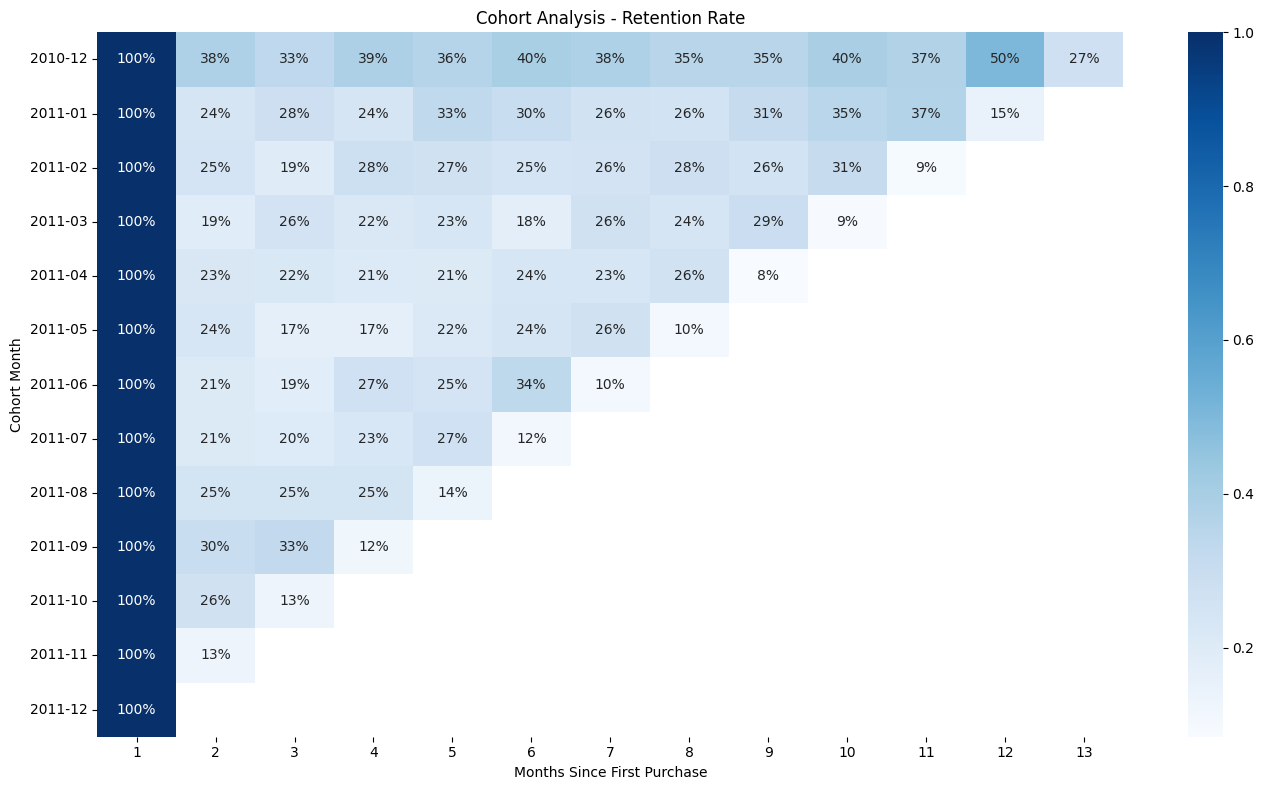

In [39]:
plt.figure(figsize=(14, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="Blues")
plt.title('Cohort Analysis - Retention Rate')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.tight_layout()
plt.show()

In [40]:
# Step 3: RFM Segmentation (Recency, Frequency, Monetary)

# Step 3.1: Define the snapshot date (one day after the last invoice date in the dataset)
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)


In [42]:
# 0) Quick sanity check of column names (optional)
print(df_cleaned.columns.tolist())

# 1) Ensure types & required columns exist
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned = df_cleaned.dropna(subset=['CustomerID'])        # drop rows without customer
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

# Create Monetary column (Quantity * UnitPrice)
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# 2) RFM snapshot date = day after last invoice
snapshot_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

# 3) Aggregate per customer (named aggregation avoids KeyError)
rfm = df_cleaned.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency = ('InvoiceNo', 'nunique'),
    Monetary = ('TotalPrice', 'sum')
).reset_index()

rfm.head()


['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country', 'InvoiceMonth', 'CohortMonth', 'CohortIndex']


,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [43]:
# Step 3.2: Aggregate data per customer
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [44]:
# Step 3.3: Assign RFM scores (1=lowest, 4=highest)
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

In [45]:
# Combine RFM scores into a single segment
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)


In [46]:
# Average score for easier segmentation
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].astype(int).mean(axis=1)

In [47]:
# Create meaningful segments
def rfm_level(score):
    if score >= 3.5:
        return 'Champions'
    elif score >= 2.5:
        return 'Loyal'
    elif score >= 1.5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_level)


In [48]:
# Show segmentation results
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score,Segment
0,12346,326,2,5342.40,1,2,1,121,1.333333,At Risk
1,12347,2,7,431501.00,4,4,4,444,4.000000,Champions
2,12348,75,4,82378.47,2,3,2,232,2.333333,Potential
3,12349,19,1,176075.12,3,1,3,313,2.333333,Potential
4,12350,310,1,48173.37,1,1,2,112,1.333333,At Risk
5,12352,36,11,241567.46,3,4,3,343,3.333333,Loyal
6,12353,204,1,4357.89,1,1,1,111,1.000000,At Risk
7,12354,232,1,161522.49,1,1,3,113,1.666667,Potential
8,12355,214,1,37648.28,1,1,1,111,1.000000,At Risk
9,12356,23,3,161617.98,3,2,3,323,2.666667,Loyal


In [49]:
from IPython.display import display
display(rfm.head(20))

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM_Score,Segment
0,12346,326,2,5342.40,1,2,1,121,1.333333,At Risk
1,12347,2,7,431501.00,4,4,4,444,4.000000,Champions
2,12348,75,4,82378.47,2,3,2,232,2.333333,Potential
3,12349,19,1,176075.12,3,1,3,313,2.333333,Potential
4,12350,310,1,48173.37,1,1,2,112,1.333333,At Risk
5,12352,36,11,241567.46,3,4,3,343,3.333333,Loyal
6,12353,204,1,4357.89,1,1,1,111,1.000000,At Risk
7,12354,232,1,161522.49,1,1,3,113,1.666667,Potential
8,12355,214,1,37648.28,1,1,1,111,1.000000,At Risk
9,12356,23,3,161617.98,3,2,3,323,2.666667,Loyal


In [50]:
# Show distribution of segments
rfm['Segment'].value_counts()

Segment
Potential    1471
Loyal        1255
Champions     861
At Risk       785
Name: count, dtype: int64

In [51]:
plt.tight_layout()
plt.savefig('retention_heatmap.png', dpi=200, bbox_inches='tight')   # name per chart
plt.show()


<Figure size 640x480 with 0 Axes>

In [52]:
print(df_cleaned.columns)


Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'InvoiceMonth', 'CohortMonth',
       'CohortIndex', 'TotalPrice'],
      dtype='object')


In [53]:
# 0) Imports (run once per session)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 1) Clean + create working copy
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df_cleaned = df.dropna(subset=['CustomerID', 'InvoiceDate']).copy()
df_cleaned.loc[:, 'CustomerID'] = df_cleaned['CustomerID'].astype(int)

# Features used later
df_cleaned.loc[:, 'TotalPrice']   = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_cleaned.loc[:, 'InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# First purchase month (cohort)
df_cleaned.loc[:, 'CohortMonth'] = (
    df_cleaned.groupby('CustomerID')['InvoiceDate']
    .transform('min')
    .dt.to_period('M').dt.to_timestamp()
)

# Months since first purchase (index starts at 0; add +1 if you want 1-based)
df_cleaned.loc[:, 'CohortIndex'] = (
    (df_cleaned['InvoiceMonth'].dt.year  - df_cleaned['CohortMonth'].dt.year) * 12 +
    (df_cleaned['InvoiceMonth'].dt.month - df_cleaned['CohortMonth'].dt.month)
)

print(df_cleaned[['InvoiceMonth','CohortMonth','CohortIndex']].head())


  InvoiceMonth CohortMonth  CohortIndex
0   2010-12-01  2010-12-01            0
1   2010-12-01  2010-12-01            0
2   2010-12-01  2010-12-01            0
3   2010-12-01  2010-12-01            0
4   2010-12-01  2010-12-01            0


In [54]:
# 2) Build retention matrix
cohort_data = (
    df_cleaned
    .groupby(['CohortMonth','CohortIndex'])['CustomerID']
    .nunique()
    .reset_index()
)

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID').sort_index()

cohort_sizes = cohort_counts.iloc[:, 0]
retention_matrix = cohort_counts.divide(cohort_sizes, axis=0).fillna(0)
retention_matrix = retention_matrix.reindex(sorted(retention_matrix.columns), axis=1)

print('Shapes — counts:', cohort_counts.shape, ' retention:', retention_matrix.shape)
retention_matrix.head()


Shapes — counts: (13, 13)  retention: (13, 13)


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,0.000000
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,0.000000,0.000000
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,0.000000,0.000000,0.000000
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,0.000000,0.000000,0.000000,0.000000


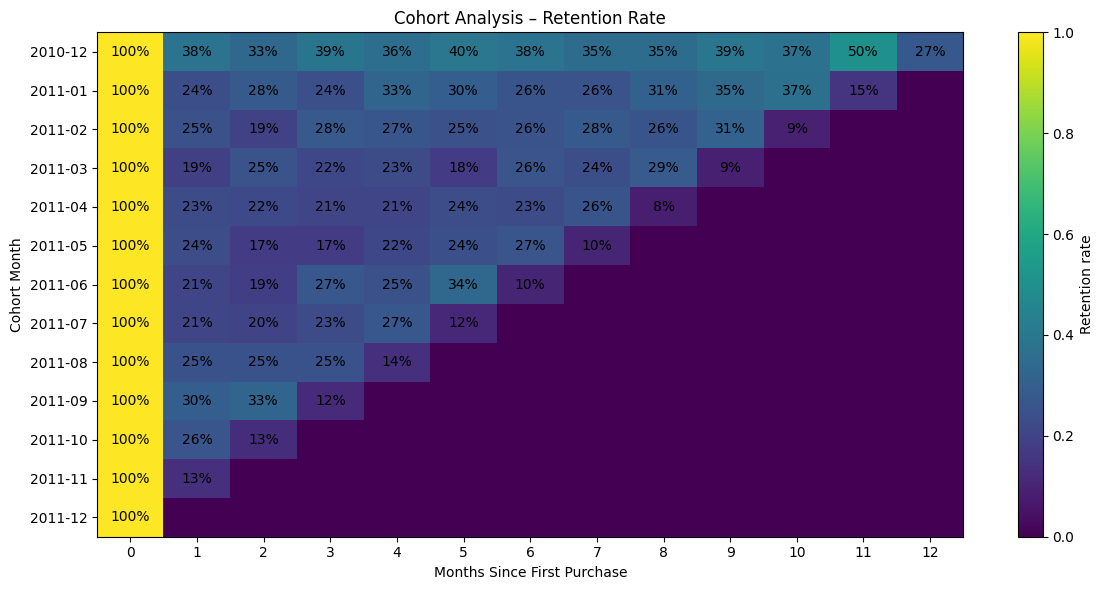

In [55]:
# 3) Plot heatmap with pure matplotlib
fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(retention_matrix.values, aspect='auto')

ax.set_xlabel('Months Since First Purchase')
ax.set_ylabel('Cohort Month')
ax.set_xticks(np.arange(retention_matrix.shape[1]))
ax.set_yticks(np.arange(retention_matrix.shape[0]))
ax.set_yticklabels([d.strftime('%Y-%m') for d in retention_matrix.index])

# annotate %
for i in range(retention_matrix.shape[0]):
    for j in range(retention_matrix.shape[1]):
        v = retention_matrix.iat[i, j]
        if v > 0:
            ax.text(j, i, f'{v:.0%}', ha='center', va='center')

fig.colorbar(im, ax=ax, label='Retention rate')
ax.set_title('Cohort Analysis – Retention Rate')
plt.tight_layout()
plt.savefig('retention_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()


In [ ]:
%pip install python-pptx


Note: you may need to restart the kernel to use updated packages.


In [ ]:
plt.tight_layout()
plt.savefig('retention_heatmap.png', dpi=200, bbox_inches='tight')   # name per chart
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
print(retention_matrix.shape)
retention_matrix.head()


(13, 13)


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,0.000000
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,0.000000,0.000000
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,0.000000,0.000000,0.000000
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,0.000000,0.000000,0.000000,0.000000


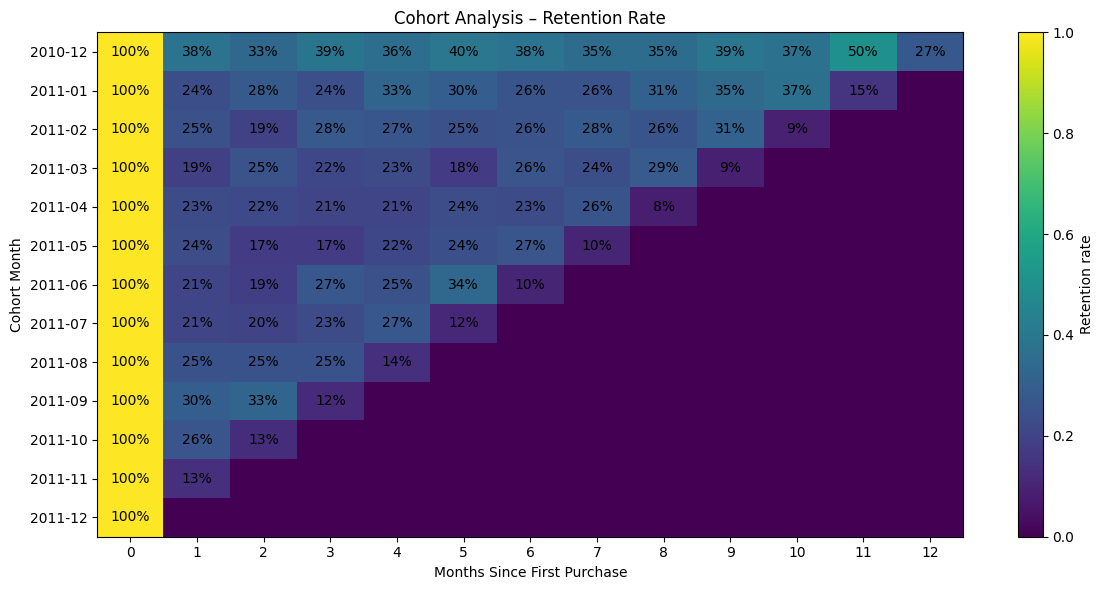

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# (optional) start clean
plt.close('all')

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(retention_matrix.values, aspect='auto')

ax.set_xlabel('Months Since First Purchase')
ax.set_ylabel('Cohort Month')
ax.set_xticks(np.arange(retention_matrix.shape[1]))
ax.set_yticks(np.arange(retention_matrix.shape[0]))
ax.set_yticklabels([d.strftime('%Y-%m') for d in retention_matrix.index])

# annotate percentages
for i in range(retention_matrix.shape[0]):
    for j in range(retention_matrix.shape[1]):
        v = retention_matrix.iat[i, j]
        if v > 0:
            ax.text(j, i, f'{v:.0%}', ha='center', va='center')

fig.colorbar(im, ax=ax, label='Retention rate')
ax.set_title('Cohort Analysis – Retention Rate')

fig.tight_layout()
fig.savefig('retention_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()


In [ ]:
plt.savefig('avg_retention_curve.png', dpi=200, bbox_inches='tight')
plt.savefig('cohort_sizes.png', dpi=200, bbox_inches='tight')
plt.savefig('segment_distribution.png', dpi=200, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [57]:
import datetime as dt

# Reference date = one day after the last InvoiceDate in dataset
ref_date = df_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

# Aggregate to build RFM table
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,   # Recency
    'InvoiceNo': 'count',                                # Frequency
    'TotalPrice': 'sum'                                  # Monetary
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,2,5342.40
12347,2,182,431501.00
12348,75,31,82378.47
12349,19,73,176075.12
12350,310,17,48173.37


In [ ]:
# Score 1–4 (quartiles) for each RFM dimension
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine into a single RFM Score
rfm['RFM_Score'] = (rfm['R_Score'].astype(int) +
                    rfm['F_Score'].astype(int) +
                    rfm['M_Score'].astype(int))


In [ ]:
def rfm_level(score):
    if score >= 9:
        return 'Champions'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_level)
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,2,5342.40,1,1,1,3,At Risk
12347.0,2,182,431501.00,4,4,4,12,Champions
12348.0,75,31,82378.47,2,2,2,6,Potential
12349.0,19,73,176075.12,3,3,3,9,Champions
12350.0,310,17,48173.37,1,1,2,4,At Risk


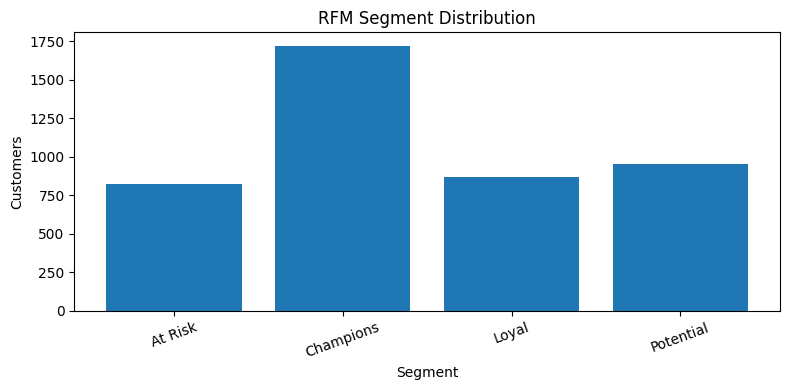

In [ ]:
seg = rfm['Segment'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(seg.index, seg.values)
ax.set_xlabel('Segment')
ax.set_ylabel('Customers')
ax.set_title('RFM Segment Distribution')
ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.savefig('segment_distribution.png', dpi=200, bbox_inches='tight')
plt.show()


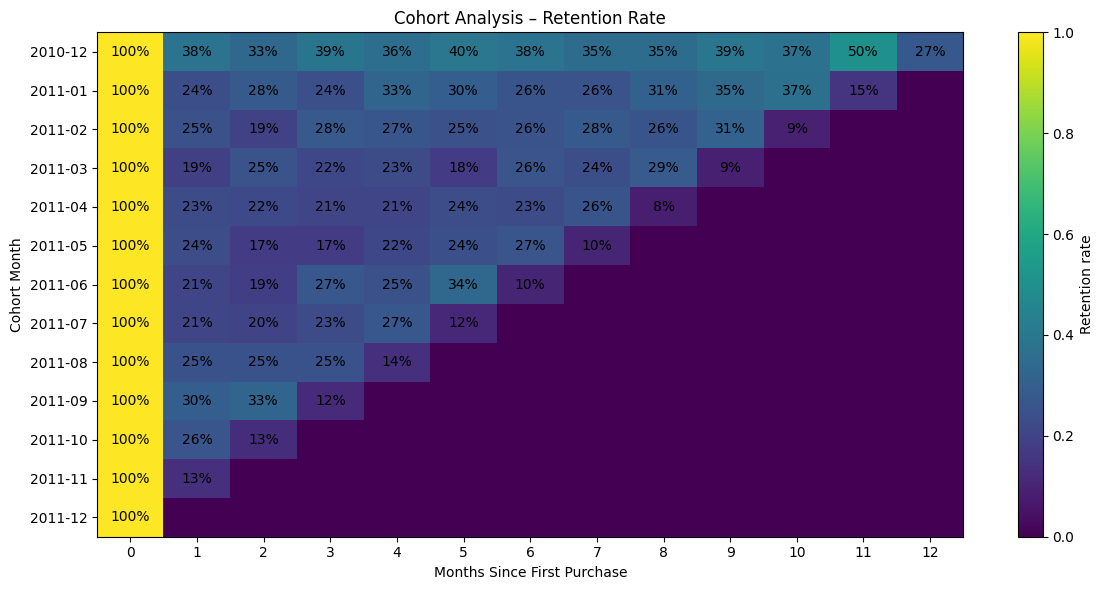

In [ ]:
# 1) Retention heatmap (you already have this)
fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(retention_matrix.values, aspect='auto')
ax.set_xlabel('Months Since First Purchase')
ax.set_ylabel('Cohort Month')
ax.set_xticks(np.arange(retention_matrix.shape[1]))
ax.set_yticks(np.arange(retention_matrix.shape[0]))
ax.set_yticklabels([d.strftime('%Y-%m') for d in retention_matrix.index])
for i in range(retention_matrix.shape[0]):
    for j in range(retention_matrix.shape[1]):
        v = retention_matrix.iat[i, j]
        if v > 0: ax.text(j, i, f'{v:.0%}', ha='center', va='center')
fig.colorbar(im, ax=ax, label='Retention rate')
ax.set_title('Cohort Analysis – Retention Rate')
fig.tight_layout()
fig.savefig('retention_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close(fig)

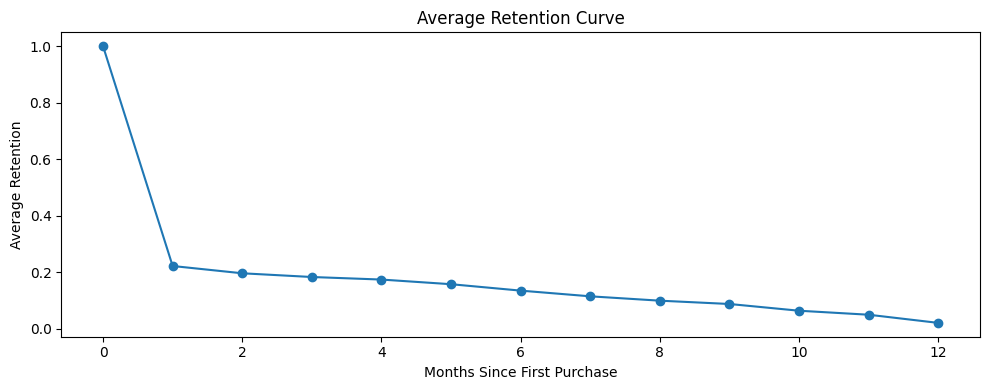

In [ ]:
# 2) Average retention curve (line chart)
avg_curve = retention_matrix.mean(axis=0)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(avg_curve.index, avg_curve.values, marker='o')
ax.set_xlabel('Months Since First Purchase')
ax.set_ylabel('Average Retention')
ax.set_title('Average Retention Curve')
fig.tight_layout()
fig.savefig('avg_retention_curve.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close(fig)

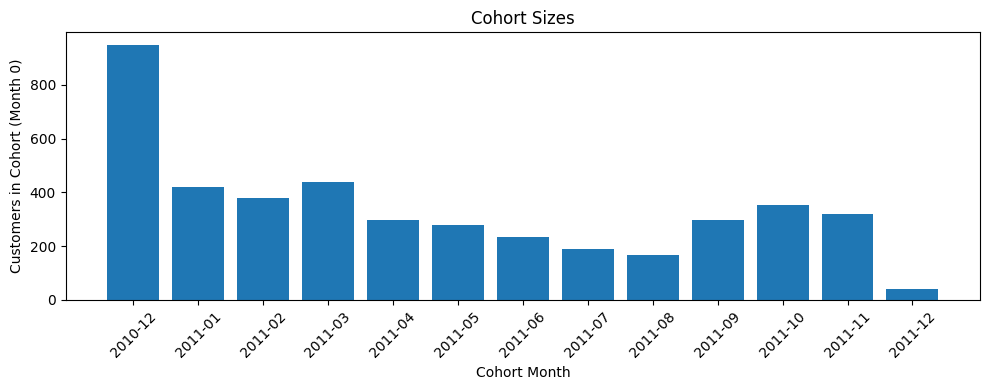

In [ ]:
# 3) Cohort sizes (bar of month 0 counts)
cohort_sizes = cohort_counts.iloc[:, 0]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar([d.strftime('%Y-%m') for d in cohort_sizes.index], cohort_sizes.values)
ax.set_xlabel('Cohort Month')
ax.set_ylabel('Customers in Cohort (Month 0)')
ax.set_title('Cohort Sizes')
ax.tick_params(axis='x', rotation=45)
fig.tight_layout()
fig.savefig('cohort_sizes.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close(fig)

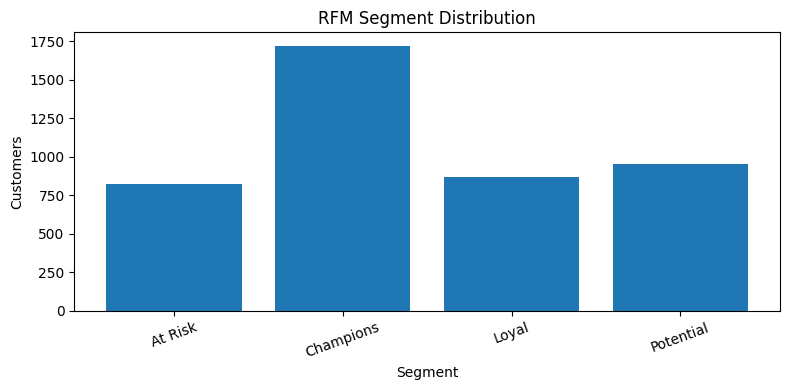

In [ ]:
# 4) Segment distribution (if you built rfm['Segment'])
seg = rfm['Segment'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(seg.index, seg.values)
ax.set_xlabel('Segment')
ax.set_ylabel('Customers')
ax.set_title('RFM Segment Distribution')
ax.tick_params(axis='x', rotation=20)
fig.tight_layout()
fig.savefig('segment_distribution.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close(fig)